PRAKHAR BHARDWAJ

prakharb

Q1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## a) load/merge data and visualize logerror

In [ ]:
# load data into DataFrames
train_df1 = pd.read_csv("train.csv")
properties_df2 = pd.read_csv('properties.csv')#,  on_bad_lines='skip')
merge_ = pd.merge(train_df1,properties_df2,on='id',how='inner')
merge_
#merge.describe()

,id,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14366692,-0.1684,1/1/16,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015,239071.0,10153.02,NaN,NaN,NaN
1,14739064,-0.0030,1/2/16,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015,143230.0,2172.88,NaN,NaN,6.059040e+13
2,10854446,0.3825,1/3/16,NaN,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,55396.0,105954.0,2015,50558.0,1443.69,NaN,NaN,6.037140e+13
3,11672170,-0.0161,1/3/16,1.0,NaN,NaN,4.0,5.0,NaN,1.0,...,NaN,NaN,559040.0,1090127.0,2015,531087.0,13428.94,NaN,NaN,6.037260e+13
4,12524288,-0.0419,1/3/16,NaN,NaN,NaN,1.0,1.0,NaN,7.0,...,NaN,NaN,56233.0,70316.0,2015,14083.0,913.17,NaN,NaN,6.037570e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,12756771,0.0658,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,65728.0,307167.0,2015,241439.0,4038.70,NaN,NaN,6.037550e+13
31721,11295458,-0.0294,12/30/16,1.0,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,40163.0,50203.0,2015,10040.0,1263.39,Y,15.0,6.037900e+13
31722,11308315,0.0070,12/30/16,1.0,NaN,NaN,3.0,5.0,NaN,4.0,...,NaN,NaN,248378.0,331525.0,2015,83147.0,6461.79,NaN,NaN,6.037900e+13
31723,11703478,0.0431,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,17520.0,39934.0,2015,22414.0,627.91,NaN,NaN,6.037230e+13


In [ ]:
#def plot_boxplot(df,ft):
#  df.boxplot(column=[ft])
#  plt.grid(False)
#  plt.show()

In [ ]:
#plot_boxplot(merge_,"logerror")

In [ ]:
# eliminate outliers

max_value = merge_['logerror'].quantile(.99)
print(max_value)
min_value = merge_['logerror'].quantile(.01)
print(min_value)

#outliers_top = (merge['logerror'] > max_value)
#print(outliers_top)

#merge.mask(outliers_top, max_value, axis=1)
#merge_top = merge[merge['logerror']>max_value]
#print(merge_top)


merge_.loc[merge_['logerror'] >max_value,"logerror" ] = max_value
merge_.loc[merge_['logerror'] <min_value,"logerror" ] = min_value
print(merge_)



0.47576799999999714
-0.3299
             id  logerror transactiondate  airconditioningtypeid  \
0      14366692   -0.1684          1/1/16                    NaN   
1      14739064   -0.0030          1/2/16                    NaN   
2      10854446    0.3825          1/3/16                    NaN   
3      11672170   -0.0161          1/3/16                    1.0   
4      12524288   -0.0419          1/3/16                    NaN   
...         ...       ...             ...                    ...   
31720  12756771    0.0658        12/30/16                    NaN   
31721  11295458   -0.0294        12/30/16                    1.0   
31722  11308315    0.0070        12/30/16                    1.0   
31723  11703478    0.0431        12/30/16                    NaN   
31724  12566293    0.4207        12/30/16                    NaN   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                           NaN           NaN          3.5         4.0   
1      

<Figure size 3600x3600 with 0 Axes>

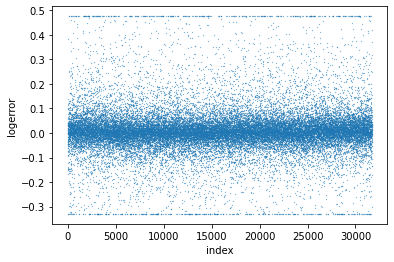

In [ ]:
# scatter of logerr
plt.figure(figsize = (50,50))
merge_.reset_index().plot.scatter(x='index' , y = 'logerror', s = 0.05);
#merge.plot.scatter(x = 'logerror' , y = 'id', s = 5)

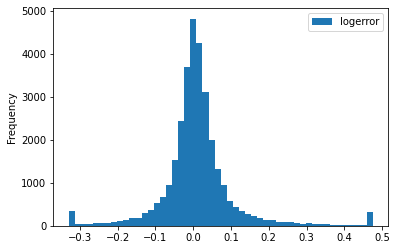

In [ ]:
# histogram of logerr
merge_hist = merge_.reset_index().plot(kind='hist',x='index',y='logerror',bins=50)

## b) data cleaning

In [ ]:
# build new data frame
merge_new = merge_.isnull().sum()#.to_frame('missing_count')
#print(merge_new)
#merge_new.shape
column_names=["missing_count"]
df=pd.DataFrame(merge_new, columns=column_names)
#print(df)
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'column_name'})
#print(df)

#df["missing_ratio"] = ""
#print(df)
missing_ratio = []
for value in df["missing_count"]:
  a = value/31725
  missing_ratio.append(a)

df["missing_ratio"] = missing_ratio
print(df)  


                     column_name  missing_count  missing_ratio
0                             id              0       0.000000
1                       logerror              0       0.000000
2                transactiondate              0       0.000000
3          airconditioningtypeid          21563       0.679685
4       architecturalstyletypeid          31628       0.996942
5                   basementsqft          31711       0.999559
6                    bathroomcnt              0       0.000000
7                     bedroomcnt              0       0.000000
8            buildingclasstypeid          31717       0.999748
9          buildingqualitytypeid          11488       0.362112
10             calculatedbathnbr            414       0.013050
11                    decktypeid          31502       0.992971
12      finishedfloor1squarefeet          29381       0.926115
13  calculatedfinishedsquarefeet            228       0.007187
14          finishedsquarefeet12           1647       0

In [ ]:
# fill missing data
#from pandas.api.types import is_numeric_dtype
#mean = 0;

#for i in range(0,60,1):
#  if is_numeric_dtype(merge.iloc[:,i])==False:
#    pass
#  else:
#    mean = merge.iloc[:,i].mean();
#    merge.iloc[:,1].fillna(value=mean, inplace=True)
print(type(merge_))
column_means = merge_.mean(numeric_only=True)

print(column_means)

merge_new = merge_.fillna(column_means)
#print(merge["pooltypeid7"].mean())
print(merge_new)

<class 'pandas.core.frame.DataFrame'>
id                              1.297687e+07
logerror                        1.081681e-02
airconditioningtypeid           1.809683e+00
architecturalstyletypeid        7.453608e+00
basementsqft                    6.705714e+02
bathroomcnt                     2.275855e+00
bedroomcnt                      3.035713e+00
buildingclasstypeid             4.000000e+00
buildingqualitytypeid           5.570193e+00
calculatedbathnbr               2.305564e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.345147e+03
calculatedfinishedsquarefeet    1.770080e+03
finishedsquarefeet12            1.742283e+03
finishedsquarefeet13            1.441714e+03
finishedsquarefeet15            2.374685e+03
finishedsquarefeet50            1.350906e+03
finishedsquarefeet6             2.309112e+03
fips                            6.048712e+03
fireplacecnt                    1.200239e+00
fullbathcnt                     2.237041e+00
garagecarcnt     

## c) univariate analysis

In [ ]:

# make bar chart
#corr = merge_new.corr(method='pearson')
#corr
corr = merge_new.corrwith(merge_new["logerror"])
corr = corr.drop(["logerror"])
print(corr)

id                              0.006562
airconditioningtypeid           0.006328
architecturalstyletypeid       -0.001234
basementsqft                    0.005239
bathroomcnt                     0.033445
bedroomcnt                      0.032168
buildingclasstypeid                  NaN
buildingqualitytypeid          -0.001840
calculatedbathnbr               0.034345
decktypeid                           NaN
finishedfloor1squarefeet        0.000807
calculatedfinishedsquarefeet    0.042841
finishedsquarefeet12            0.039504
finishedsquarefeet13            0.012608
finishedsquarefeet15            0.014687
finishedsquarefeet50            0.000621
finishedsquarefeet6            -0.000656
fips                            0.007863
fireplacecnt                    0.005099
fullbathcnt                     0.032986
garagecarcnt                   -0.000039
garagetotalsqft                 0.005227
heatingorsystemtypeid          -0.019511
latitude                        0.003277
longitude       

In [ ]:
#corr_sorted = corr.unstack().sort_values()  
corr_sorted = corr.sort_values() 
print(corr_sorted)

propertylandusetypeid          -0.028459
taxamount                      -0.024282
heatingorsystemtypeid          -0.019511
taxdelinquencyyear             -0.011826
landtaxvaluedollarcnt          -0.006758
yardbuildingsqft17             -0.006088
regionidcounty                 -0.004874
regionidneighborhood           -0.004454
typeconstructiontypeid         -0.002361
taxvaluedollarcnt              -0.002060
buildingqualitytypeid          -0.001840
poolsizesum                    -0.001442
regionidzip                    -0.001253
architecturalstyletypeid       -0.001234
threequarterbathnbr            -0.001133
finishedsquarefeet6            -0.000656
regionidcity                   -0.000542
garagecarcnt                   -0.000039
finishedsquarefeet50            0.000621
finishedfloor1squarefeet        0.000807
latitude                        0.003277
yardbuildingsqft26              0.004131
fireplacecnt                    0.005099
garagetotalsqft                 0.005227
basementsqft    

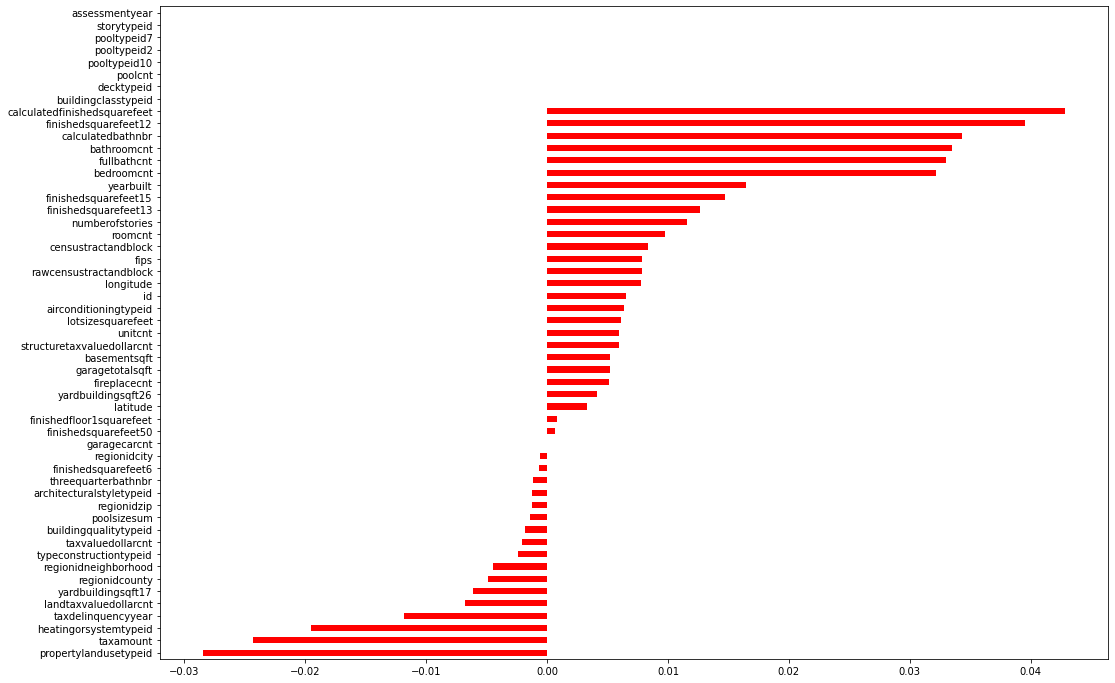

In [ ]:
#import matplotlib.colors as mcolors
#from matplotlib.colors import TwoSlopeNorm
fig, ax = plt.subplots(figsize =(17,12))
corr_sorted.plot.barh(color='r')

# Explain Reason
There are no correlation values for some variables at the top of the chart as these variables had NAN values. Thus the relation with the logerror numerical value wasn't possible.

## d) non-linear regression model

In [ ]:
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"
merge_new_drop = merge_new.drop(columns=["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag", "id", "transactiondate"])
merge_new_drop

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,-0.1684,1.809683,7.453608,670.571429,3.5,4.0,4.0,5.570193,3.5,66.0,...,374.852941,2014.0,1.450479,346458.0,585529.0,2015,239071.0,10153.02,13.314845,6.048996e+13
1,-0.0030,1.809683,7.453608,670.571429,1.0,2.0,4.0,5.570193,1.0,66.0,...,374.852941,1984.0,1.450479,66834.0,210064.0,2015,143230.0,2172.88,13.314845,6.059040e+13
2,0.3825,1.809683,7.453608,670.571429,2.0,2.0,4.0,7.000000,2.0,66.0,...,374.852941,1954.0,1.450479,55396.0,105954.0,2015,50558.0,1443.69,13.314845,6.037140e+13
3,-0.0161,1.000000,7.453608,670.571429,4.0,5.0,4.0,1.000000,4.0,66.0,...,374.852941,1995.0,1.450479,559040.0,1090127.0,2015,531087.0,13428.94,13.314845,6.037260e+13
4,-0.0419,1.809683,7.453608,670.571429,1.0,1.0,4.0,7.000000,1.0,66.0,...,374.852941,1970.0,1.450479,56233.0,70316.0,2015,14083.0,913.17,13.314845,6.037570e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,0.0658,1.809683,7.453608,670.571429,1.0,3.0,4.0,7.000000,1.0,66.0,...,374.852941,1948.0,1.450479,65728.0,307167.0,2015,241439.0,4038.70,13.314845,6.037550e+13
31721,-0.0294,1.000000,7.453608,670.571429,2.0,2.0,4.0,7.000000,2.0,66.0,...,374.852941,1992.0,1.450479,40163.0,50203.0,2015,10040.0,1263.39,15.000000,6.037900e+13
31722,0.0070,1.000000,7.453608,670.571429,3.0,5.0,4.0,4.000000,3.0,66.0,...,374.852941,2011.0,1.450479,248378.0,331525.0,2015,83147.0,6461.79,13.314845,6.037900e+13
31723,0.0431,1.809683,7.453608,670.571429,1.0,3.0,4.0,7.000000,1.0,66.0,...,374.852941,1912.0,1.450479,17520.0,39934.0,2015,22414.0,627.91,13.314845,6.037230e+13


In [ ]:
# split and train
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
merge_new_drop1=merge_new_drop
x_data=merge_new_drop1.drop(columns=["logerror"])
y_data=merge_new_drop["logerror"]
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size = 0.3, random_state=1)
normalizer = preprocessing.Normalizer()
normalized_train_data = normalizer.fit_transform(x_train)
normalized_test_data = normalizer.fit_transform(x_test)

In [ ]:
# report importances and mse
model = MLPRegressor(verbose=True, hidden_layer_sizes=(100), learning_rate_init=0.1, random_state=2500)
model.fit(x_train, y_train)

Iteration 1, loss = 18349098663304604910878720.00000000
Iteration 2, loss = 37719248584885912.00000000
Iteration 3, loss = 457203549733.07427979
Iteration 4, loss = 994776.95731480
Iteration 5, loss = 12.91433665
Iteration 6, loss = 0.00546770
Iteration 7, loss = 0.00536596
Iteration 8, loss = 0.00536664
Iteration 9, loss = 0.00536560
Iteration 10, loss = 0.00536653
Iteration 11, loss = 0.00536524
Iteration 12, loss = 0.00536666
Iteration 13, loss = 0.00536573
Iteration 14, loss = 0.00536810
Iteration 15, loss = 0.00536627
Iteration 16, loss = 0.00536895
Iteration 17, loss = 0.00536518
Iteration 18, loss = 0.00536877
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=100, learning_rate_init=0.1, random_state=2500,
             verbose=True)

In [ ]:
expected_y  = y_test
predicted_y = model.predict(x_test)
mean_squared_error(predicted_y,expected_y)

0.010294706504191179